In [1]:
import pandas as pd
import numpy  as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
# sklearn
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.pipeline         import Pipeline
from sklearn.preprocessing    import MinMaxScaler
from sklearn.linear_model     import Ridge
from sklearn.metrics          import mean_squared_error

In [2]:
# Data request from Yahoo Finance
data = yf.download(tickers='EURUSD=X', start='2000-01-01', end='2022-01-01')
# Change index format
data.index = pd.to_datetime(data.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0


### RSI, 3MA

In [3]:
# Adding indicators
data['RSI']  = ta.rsi(data.Close, length=14)
data['EMAF'] = ta.ema(data.Close, length=21)
data['EMAM'] = ta.ema(data.Close, length=50)
data['EMAS'] = ta.ema(data.Close, length=100)

# Add column 'NextClose' for next close price
data['NextClose'] = data['Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Open','High','Low','Adj Close','Volume', 'Close','Date'], axis=1, inplace=True)
data.head()

,RSI,EMAF,EMAM,EMAS,NextClose
0,41.059086,1.212556,1.225697,1.240527,1.200696
1,41.325468,1.211478,1.224716,1.239739,1.184806
2,34.680444,1.209054,1.223151,1.238651,1.181000
3,33.299369,1.206503,1.221498,1.237509,1.192506
4,40.954946,1.205231,1.220361,1.236618,1.185003


In [4]:
data.columns

Index(['RSI', 'EMAF', 'EMAM', 'EMAS', 'NextClose'], dtype='object')

In [5]:
# Set featuer variable and target variable
X = data[['RSI', 'EMAF', 'EMAM', 'EMAS']]
y = data['NextClose']

In [6]:
# Train/Test split 80/20
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size=0.2)

In [7]:
def pred_viz(y_pred):
    ''' Visualization function for 
        Train, Test, and Prediction data'''
    plt.figure(figsize=(12,5))
    y_train.plot(label='TrainData')
    y_test.plot(label='TestData')
    pd.Series(y_pred,y_test.index).plot(label='Prediction',alpha=0.75)
    plt.legend();

BestScore:  0.96965
BestParams: {'rg__alpha': 0.01}
MSE Score:  5e-05
RMSE Score: 0.00728


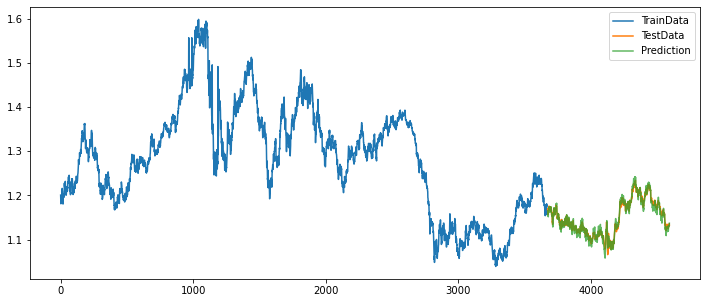

In [8]:
# Ridge with pipeline and gridsearch
pipe3 = Pipeline([('sc',MinMaxScaler(feature_range=(0,1))),('rg',Ridge())])
params3 = {'rg__alpha': [.01,.1,1,10]}
grid3 = GridSearchCV(pipe3,param_grid=params3)
grid3.fit(X_train,y_train)
y_pred3 = grid3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = mean_squared_error(y_test, y_pred3, squared=False)
# --------------------------------------------------------
print(f'BestScore:  {grid3.best_score_.round(5)}')
print(f'BestParams: {grid3.best_params_}')
print(f'MSE Score:  {mse3.round(5)}')
print(f'RMSE Score: {rmse3.round(5)}')
# --------------------------------------------------------
# Visualization
pred_viz(y_pred3)

### OPEN HIGH LOW

In [9]:
# Data request from Yahoo Finance
data = yf.download(tickers='EURUSD=X', start='2000-01-01', end='2022-01-01')
# Change index format
data.index = pd.to_datetime(data.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
data.reset_index(inplace=True)
# Add column 'NextClose' for next close price
data['NextClose'] = data['Close'].shift(-1)
data.dropna(inplace=True)
data.drop(['Open','Close','Adj Close','Volume','Date'], axis=1, inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,High,Low,NextClose
0,1.204007,1.194401,1.208897
1,1.210903,1.194600,1.212298
2,1.213003,1.207700,1.208094
3,1.214403,1.204398,1.218695
4,1.219096,1.206593,1.222001


In [10]:
# Set featuer variable and target variable
X = data[['High','Low']]
y = data['NextClose']

In [11]:
# Train/Test split 80/20
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size=0.2)

BestScore:  0.97765
BestParams: {'rg__alpha': 0.01}
MSE Score:  1e-05
RMSE Score: 0.00347


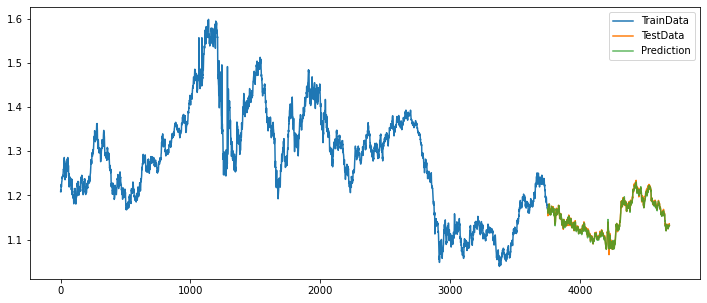

In [12]:
# Ridge with pipeline and gridsearch
pipe3 = Pipeline([('sc',MinMaxScaler(feature_range=(0,1))),('rg',Ridge())])
params3 = {'rg__alpha': [.01,.1,1,10]}
grid3 = GridSearchCV(pipe3,param_grid=params3)
grid3.fit(X_train,y_train)
y_pred3 = grid3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = mean_squared_error(y_test, y_pred3, squared=False)
# --------------------------------------------------------
print(f'BestScore:  {grid3.best_score_.round(5)}')
print(f'BestParams: {grid3.best_params_}')
print(f'MSE Score:  {mse3.round(5)}')
print(f'RMSE Score: {rmse3.round(5)}')
# --------------------------------------------------------
# Visualization
pred_viz(y_pred3)